# GOAL:

Find the important features that contribute to bankruptcy for each of the 5 datasets

1. Clean the data
2. Transform it
3. Conduct feature selection
4. Report your findings of what features contribute to bankruptcy.
5. Implement a classification model as a bonus exercise if you are able

In [33]:
#1. Data Cleaning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np


file = 'C:/Users/NETWAVE/Desktop/Codenet Project 1/bank_bankrupcy_year_data/bank_bankrupcy_year0.csv'
df= pd.read_csv(file)

df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,1
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,1
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,1
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      7024 non-null   float64
 1   X2      7024 non-null   float64
 2   X3      7024 non-null   float64
 3   X4      6997 non-null   float64
 4   X5      7019 non-null   float64
 5   X6      7024 non-null   float64
 6   X7      7024 non-null   float64
 7   X8      7002 non-null   float64
 8   X9      7026 non-null   float64
 9   X10     7024 non-null   float64
 10  X11     6988 non-null   float64
 11  X12     6997 non-null   float64
 12  X13     7027 non-null   float64
 13  X14     7024 non-null   float64
 14  X15     7025 non-null   float64
 15  X16     7002 non-null   float64
 16  X17     7002 non-null   float64
 17  X18     7024 non-null   float64
 18  X19     7027 non-null   float64
 19  X20     7027 non-null   float64
 20  X21     5405 non-null   float64
 21  X22     7024 non-null   float64
 22  

In [35]:
#checking for missing values

df.isna().sum()

X1      3
X2      3
X3      3
X4     30
X5      8
       ..
X61    22
X62     0
X63    30
X64    34
Y       0
Length: 65, dtype: int64

In [36]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
count,7024.000000,7024.000000,7024.000000,6997.000000,7.019000e+03,7024.000000,7024.000000,7002.000000,7026.000000,7024.000000,...,7.027000e+03,7026.000000,7.027000e+03,7026.000000,6.892000e+03,7005.000000,7.027000e+03,6997.000000,6993.000000,7027.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631672e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,-1.577367e+02,0.193243,1.587409e+02,0.277829,4.328830e+02,15.642228,4.763202e+03,8.126852,208.731950,0.038566
std,4.565504,5.350084,5.275459,13.257356,3.707460e+04,6.051113,8.353274,18.708327,101.995448,33.836452,...,1.322125e+04,4.344046,1.322124e+04,6.339149,2.612802e+04,261.554534,3.107835e+05,19.996419,5140.708804,0.192571
min,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,-440.550000,...,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010,0.000000
25%,0.021182,0.296678,0.026968,1.063100,-4.449800e+01,0.000000,0.028023,0.445710,1.037225,0.300785,...,2.031450e-02,0.056772,8.647650e-01,0.000000,5.923950e+00,4.829000,4.322250e+01,3.425400,2.538600,0.000000
50%,0.075802,0.482960,0.181275,1.502000,-5.373900e+00,0.000000,0.090109,1.015100,1.205750,0.492235,...,6.338200e-02,0.175745,9.388100e-01,0.028438,1.004050e+01,7.033700,6.850900e+01,5.303200,4.637700,0.000000
75%,0.160268,0.680233,0.362548,2.460700,3.777050e+01,0.146660,0.188667,2.267675,2.132975,0.675677,...,1.376950e-01,0.351922,9.820150e-01,0.273867,2.013900e+01,10.703000,1.063350e+02,8.357900,9.782200,0.000000
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,1099.500000,...,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000,1.000000


In [37]:
#considering that the standard deviation is large across the features, I am using the median 
# to replace the missing values.
#I considered dropping the missing values but realized that I will be losing about 50% of the data

dfMed = df.fillna(df.median())
dfMed

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,1
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,1
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,1
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,1


In [38]:
dfMed.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
      ..
X61    0
X62    0
X63    0
X64    0
Y      0
Length: 65, dtype: int64

In [40]:
#checking for duplicates

dfMed.duplicated()   #it shows there are no duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
7022    False
7023    False
7024    False
7025    False
7026    False
Length: 7027, dtype: bool

In [41]:
dfMed.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
count,7027.000000,7027.000000,7027.000000,7027.000000,7.027000e+03,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,...,7.027000e+03,7027.000000,7.027000e+03,7027.000000,7.027000e+03,7027.000000,7.027000e+03,7027.000000,7027.000000,7027.000000
mean,0.034677,0.560182,0.119995,2.624331,-2.628738e+02,0.059687,0.313781,2.618272,5.552236,1.825263,...,-1.577367e+02,0.193240,1.587409e+02,0.277793,4.247595e+02,15.615276,4.763202e+03,8.114797,207.744444,0.038566
std,4.564530,5.348941,5.274333,13.229226,3.705348e+04,6.049821,8.351491,18.675259,101.988203,33.829239,...,1.322125e+04,4.343737,1.322124e+04,6.338699,2.587585e+04,261.145162,3.107835e+05,19.954532,5128.274899,0.192571
min,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,-440.550000,...,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010,0.000000
25%,0.021208,0.296760,0.027011,1.064100,-4.443050e+01,0.000000,0.028037,0.447340,1.037250,0.300900,...,2.031450e-02,0.056814,8.647650e-01,0.000000,6.013050e+00,4.834250,4.322250e+01,3.432500,2.550300,0.000000
50%,0.075802,0.482960,0.181275,1.502000,-5.373900e+00,0.000000,0.090109,1.015100,1.205750,0.492235,...,6.338200e-02,0.175745,9.388100e-01,0.028438,1.004050e+01,7.033700,6.850900e+01,5.303200,4.637700,0.000000
75%,0.160240,0.680170,0.362500,2.452250,3.769500e+01,0.146570,0.188645,2.256450,2.132950,0.675585,...,1.376950e-01,0.351895,9.820150e-01,0.273595,1.982050e+01,10.687000,1.063350e+02,8.326800,9.724350,0.000000
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,1099.500000,...,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000,1.000000


<AxesSubplot:xlabel='X1'>

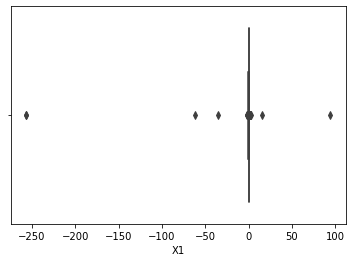

In [42]:
#checking for outliers using the boxplot for feature X1

# Supress warnings

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


sb.boxplot(dfMed['X1'])


Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'Y'],
      dtype='object')


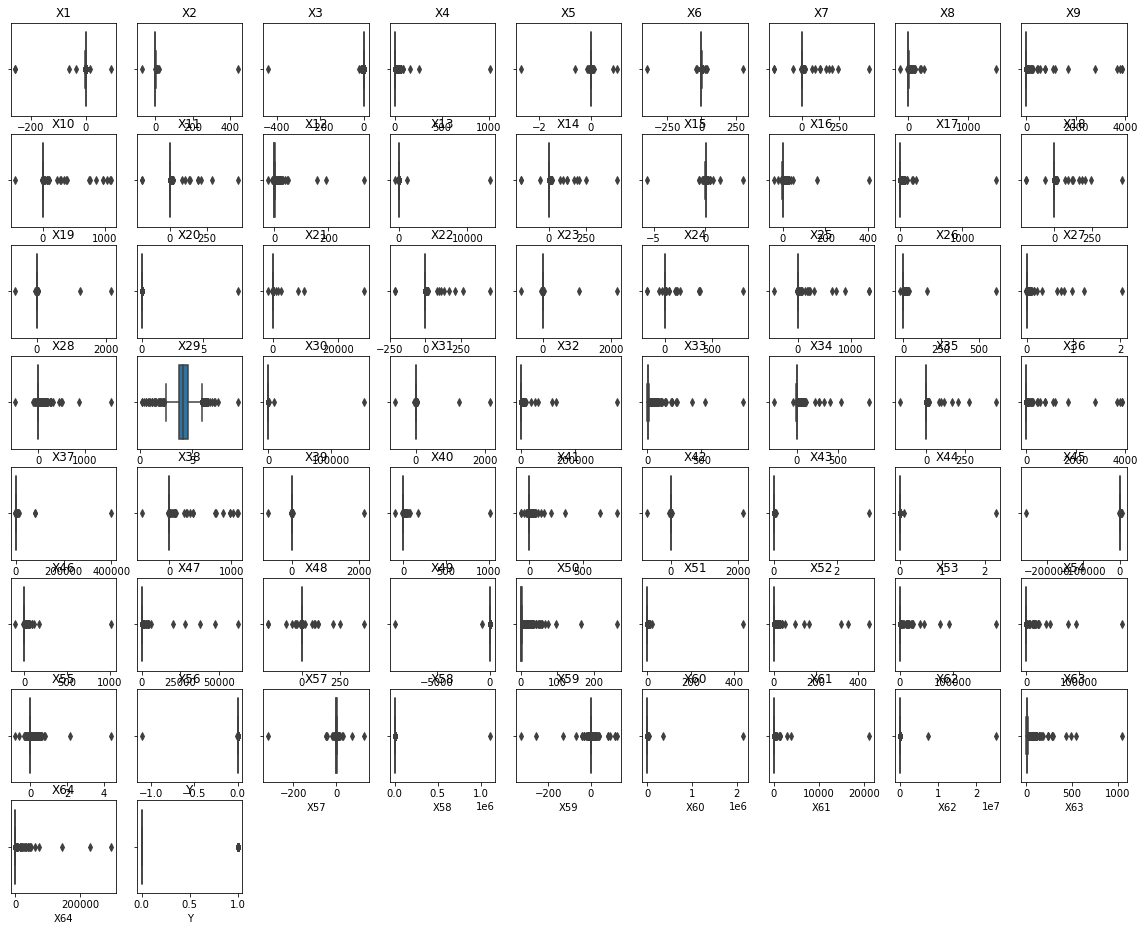

In [43]:
#showing the outliers in all the features

cat_features=dfMed.select_dtypes(exclude=np.number).columns
cont_features=dfMed.select_dtypes(include=[np.number,'float64','int64']).columns

features=print(dfMed.columns)


cont_dummy=cont_features#.drop('store_and_fwd_flag')
plt.figure(figsize=(20,16))
for index, col in enumerate(cont_dummy, start=1):
    plt.subplot(8,9,index)
    plt.title(col)
    ax = sb.boxplot(dfMed[col])

In [44]:
#Treating outliers

dfMed

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,1
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,1
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,1
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,1


In [45]:
#Removing the feature Y

subData = dfMed.iloc[:, 0:64]
subData

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,348690.0,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,2304.6,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,6332.7,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,20545.0,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,3186.6,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,-2732.8,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-2557.1,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,4826.9,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-1633.0,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005


In [46]:
Q1 = subData.quantile(0.25)
Q3 = subData.quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1
IQR

lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR

def outlier_limits(col):
    Q3, Q1 = np.nanpercentile(col, [75, 25])
    IQR = Q3 -Q1
    ubound = Q3 + 1.5*IQR
    lbound = Q1 - 1.5*IQR
    return ubound, lbound

In [47]:
# convert outlier values to missing values

for column in subData.columns:
    if subData[column].dtype !='object':
        ubound, lbound = outlier_limits(subData[column])
        subData[column] = np.where((subData[column] > ubound) | (subData[column] < lbound), np.nan, subData[column])

In [48]:
# check for missing values

subData.isnull().sum()

X1     493
X2      72
X3     128
X4     651
X5     961
      ... 
X60    822
X61    577
X62    436
X63    536
X64    879
Length: 64, dtype: int64

In [49]:
# Replace missing values removed from outliers with median

dfNew_year = subData.fillna(subData.median())

In [50]:
# check if no missing value

dfNew_year.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
      ..
X60    0
X61    0
X62    0
X63    0
X64    0
Length: 64, dtype: int64

In [51]:
dfNew_year

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.000000,0.249760,1.330500,1.13890,0.504940,...,1278.1,0.121960,0.397180,0.87804,0.001924,8.4160,5.13720,82.658,4.4158,7.42770
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,2304.6,0.121300,0.420020,0.85300,0.000000,4.1486,3.27320,107.350,3.4000,4.03285
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,6332.7,0.241140,0.168260,0.76599,0.007765,4.9909,3.95100,134.270,2.7185,5.20780
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,1278.1,0.054015,0.142070,0.94598,0.000000,4.5746,3.61470,86.435,4.2228,5.54970
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,3186.6,0.134850,0.484310,0.86515,0.124440,6.3985,4.31580,127.210,2.8692,7.89800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,-2732.8,0.011909,0.039866,0.98809,0.274140,9.0521,6.63525,31.268,11.6730,5.14890
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-2557.1,-0.011082,-0.040671,1.01110,0.007765,10.5990,7.17400,94.092,3.8792,1.75720
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,4826.9,0.008258,0.012817,0.99174,0.000000,10.4700,6.07590,51.019,7.1542,4.03285
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-1633.0,0.057829,-0.274290,0.98788,0.007765,39.7030,3.14200,65.044,1.3939,0.51005


<AxesSubplot:xlabel='X1'>

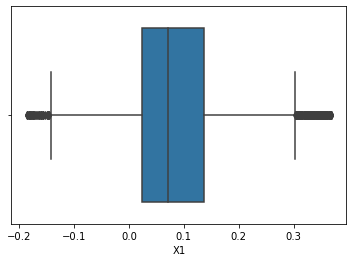

In [52]:
#using boxplot to check for changes after treating outliers

sb.boxplot(dfNew_year['X1'])

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64'],
      dtype='object')


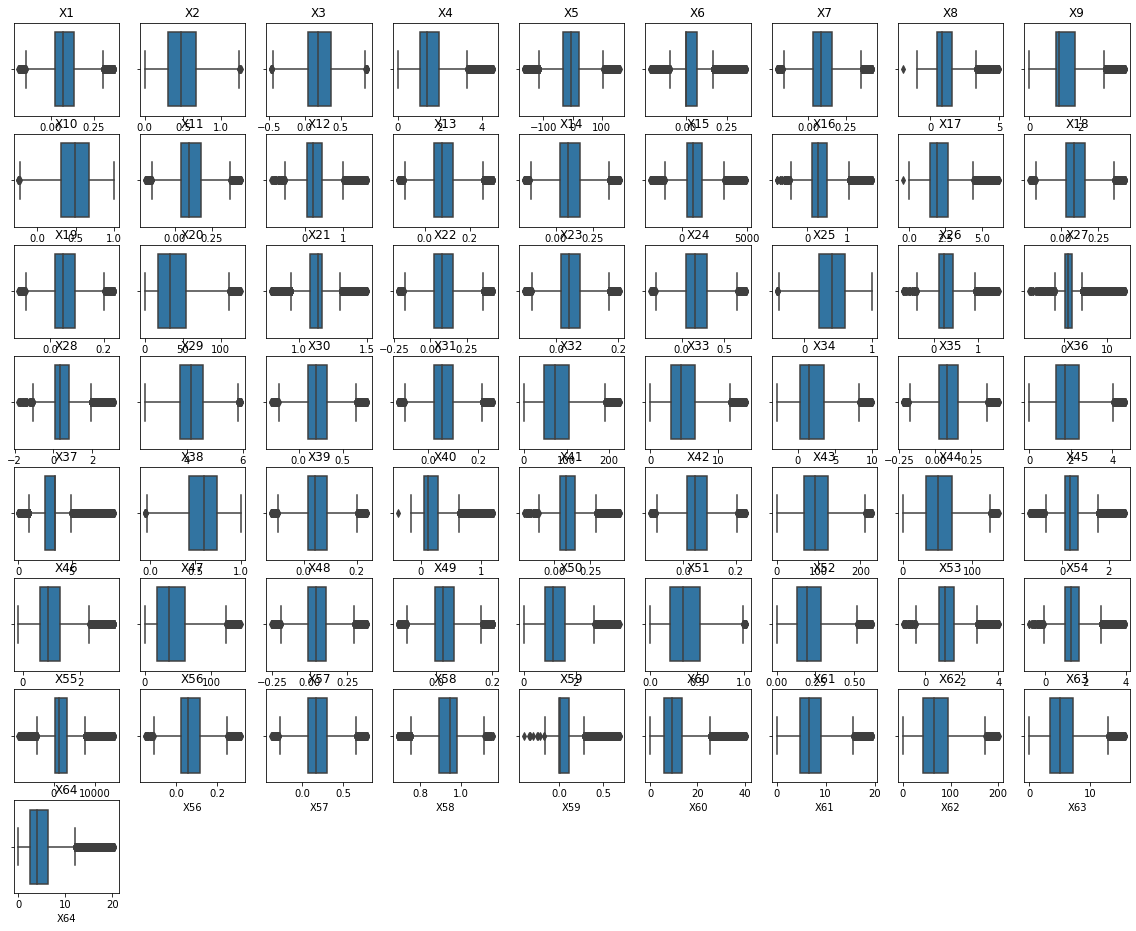

In [53]:
cat_features=dfNew_year.select_dtypes(exclude=np.number).columns
cont_features=dfNew_year.select_dtypes(include=[np.number,'float64','int64']).columns

features=print(dfNew_year.columns)


cont_dummy=cont_features#.drop('store_and_fwd_flag')
plt.figure(figsize=(20,16))
for index, col in enumerate(cont_dummy, start=1):
    plt.subplot(8,9,index)
    plt.title(col)
    ax = sb.boxplot(dfNew_year[col])

In [55]:
#Transfroming the data

dfNew_year

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.000000,0.249760,1.330500,1.13890,0.504940,...,1278.1,0.121960,0.397180,0.87804,0.001924,8.4160,5.13720,82.658,4.4158,7.42770
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,2304.6,0.121300,0.420020,0.85300,0.000000,4.1486,3.27320,107.350,3.4000,4.03285
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,6332.7,0.241140,0.168260,0.76599,0.007765,4.9909,3.95100,134.270,2.7185,5.20780
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,1278.1,0.054015,0.142070,0.94598,0.000000,4.5746,3.61470,86.435,4.2228,5.54970
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,3186.6,0.134850,0.484310,0.86515,0.124440,6.3985,4.31580,127.210,2.8692,7.89800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,-2732.8,0.011909,0.039866,0.98809,0.274140,9.0521,6.63525,31.268,11.6730,5.14890
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-2557.1,-0.011082,-0.040671,1.01110,0.007765,10.5990,7.17400,94.092,3.8792,1.75720
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,4826.9,0.008258,0.012817,0.99174,0.000000,10.4700,6.07590,51.019,7.1542,4.03285
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-1633.0,0.057829,-0.274290,0.98788,0.007765,39.7030,3.14200,65.044,1.3939,0.51005


In [56]:
dfNew_year.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
count,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,...,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000
mean,0.086727,0.489239,0.200802,1.622037,-4.001680,0.043274,0.103803,1.184234,1.484291,0.488924,...,2117.903298,0.073583,0.197422,0.928388,0.088768,11.162595,7.369886,72.531792,5.605454,5.144043
std,0.094369,0.248692,0.241017,0.849046,53.958282,0.101485,0.109034,1.067283,0.702089,0.243201,...,3534.096087,0.078305,0.195413,0.077293,0.154867,7.687455,3.623867,40.668085,3.096508,3.946425
min,-0.186650,0.000000,-0.469670,0.000000,-166.800000,-0.219590,-0.212090,-2.003200,0.000005,-0.245680,...,-8662.300000,-0.154600,-0.385680,0.689280,-0.400430,0.000047,0.000016,0.000000,0.000015,0.000010
25%,0.024285,0.296825,0.037026,1.064100,-31.615500,0.000000,0.031031,0.447830,1.037250,0.311430,...,278.000000,0.023068,0.068391,0.890325,0.000000,6.013050,4.834250,43.222500,3.432500,2.550300
50%,0.070740,0.479140,0.185150,1.401700,-5.373900,0.000000,0.084303,0.877190,1.158800,0.495620,...,1278.100000,0.057829,0.168260,0.943845,0.007765,9.052100,6.635250,65.044000,4.980300,4.032850
75%,0.135995,0.671175,0.359885,1.956100,22.992500,0.064992,0.161025,1.585850,1.808050,0.672080,...,3159.150000,0.113215,0.303080,0.979225,0.113145,13.664500,9.129750,95.307500,7.208300,6.340750
max,0.368510,1.252900,0.865020,4.530900,160.730000,0.366330,0.427830,4.958100,3.765700,1.000000,...,14717.000000,0.313040,0.793770,1.157500,0.683750,40.501000,19.466000,200.930000,15.653000,20.414000


In [57]:
#comparing the minimum values and the maximum values across the features, the values are too wide apart from each other.
#Therefore, rescaling will be done for the data

# Rescale data (between 0 and 1)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler


In [58]:
dfNew_year.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64'],
      dtype='object')

In [59]:
array = dfNew_year.values
# separate array into input and output components
X = array[:,0:64]
#Y = array[:,]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)

print(rescaledX[0:5,:])

[[0.697 0.303 0.649 0.452 0.608 0.375 0.722 0.479 0.302 0.603 0.701 0.615
  0.676 0.722 0.396 0.624 0.464 0.722 0.75  0.344 0.643 0.669 0.727 0.754
  0.649 0.603 0.428 0.721 0.477 0.396 0.713 0.42  0.275 0.268 0.661 0.378
  0.383 0.535 0.693 0.661 0.394 0.696 0.502 0.517 0.591 0.501 0.343 0.692
  0.728 0.554 0.37  0.42  0.664 0.642 0.425 0.591 0.664 0.403 0.371 0.208
  0.264 0.411 0.282 0.364]
 [0.713 0.399 0.706 0.429 0.554 0.375 0.735 0.431 0.451 0.597 0.718 0.557
  0.656 0.735 0.421 0.543 0.368 0.735 0.757 0.698 0.902 0.721 0.737 0.475
  0.572 0.527 0.409 0.434 0.35  0.537 0.72  0.545 0.212 0.456 0.649 0.369
  0.383 0.527 0.674 0.3   0.414 0.745 0.875 0.811 0.469 0.382 0.696 0.774
  0.812 0.528 0.489 0.545 0.444 0.437 0.469 0.59  0.683 0.35  0.369 0.102
  0.168 0.534 0.217 0.198]
 [0.784 0.555 0.552 0.343 0.506 0.375 0.814 0.351 0.348 0.441 0.798 0.608
  0.858 0.814 0.437 0.511 0.282 0.814 0.992 0.58  0.9   0.804 0.955 0.475
  0.497 0.496 0.409 0.579 0.55  0.675 0.947 0.789 0.146 0.

In [60]:
resc_df = pd.DataFrame(rescaledX, columns =['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49',
       'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59',
       'X60', 'X61', 'X62', 'X63', 'X64'])

resc_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
0,0.697457,0.302905,0.648900,0.451831,0.608039,0.374778,0.721731,0.478890,0.302440,0.602579,...,0.425180,0.591395,0.663750,0.403144,0.371114,0.207796,0.263906,0.411377,0.282105,0.363853
1,0.712894,0.398978,0.705722,0.429208,0.554410,0.374778,0.735139,0.430841,0.451336,0.596911,...,0.469086,0.589984,0.683115,0.349665,0.369339,0.102431,0.168149,0.534266,0.217210,0.197553
2,0.784116,0.555447,0.552038,0.343155,0.505748,0.374778,0.814399,0.350531,0.347610,0.441333,...,0.641379,0.846249,0.469660,0.163833,0.376501,0.123228,0.202969,0.668243,0.173672,0.255109
3,0.482983,0.245303,0.695637,0.550178,0.667884,0.630581,0.476300,0.555830,0.280717,0.657641,...,0.425180,0.446102,0.447454,0.548247,0.369339,0.112949,0.185692,0.430175,0.269775,0.271857
4,0.673626,0.489448,0.523919,0.310380,0.486939,0.694480,0.624156,0.378363,0.306954,0.507715,...,0.506812,0.618959,0.737623,0.375614,0.484117,0.157983,0.221709,0.633106,0.183300,0.386891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.369301,0.378402,0.249856,0.134276,0.452939,0.406132,0.360140,0.427396,0.268767,0.567176,...,0.253622,0.356062,0.360800,0.638183,0.622194,0.223502,0.340863,0.155616,0.745735,0.252224
7023,0.312146,0.465751,0.334924,0.205028,0.380325,0.351978,0.307935,0.368622,0.262643,0.460913,...,0.261137,0.306898,0.292517,0.687326,0.376501,0.261696,0.368539,0.468282,0.247824,0.086078
7024,0.347626,0.401277,0.680982,0.413516,0.539009,0.385595,0.350219,0.429052,0.267758,0.594190,...,0.576972,0.348255,0.337867,0.645978,0.369339,0.258511,0.312128,0.253914,0.457049,0.197553
7025,0.261199,0.676910,0.255602,0.126873,0.137026,0.374778,0.273933,0.313477,0.111898,0.319103,...,0.300663,0.454259,0.094442,0.637734,0.376501,0.980297,0.161409,0.323715,0.089049,0.024985


In [61]:
resc_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
count,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,...,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000
mean,0.492429,0.390485,0.502343,0.357995,0.497049,0.448634,0.493645,0.457879,0.394160,0.589722,...,0.461100,0.487946,0.494385,0.510674,0.451214,0.275612,0.378603,0.360980,0.358107,0.251986
std,0.169985,0.198493,0.180579,0.187390,0.164743,0.173207,0.170386,0.153317,0.186443,0.195236,...,0.151163,0.167448,0.165682,0.165077,0.142843,0.189809,0.186164,0.202399,0.197822,0.193320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379953,0.236910,0.379636,0.234854,0.412739,0.374778,0.379924,0.352094,0.275446,0.447234,...,0.382402,0.379924,0.384986,0.429381,0.369339,0.148466,0.248343,0.215112,0.219286,0.124929
50%,0.463633,0.382425,0.490616,0.309365,0.492859,0.374778,0.463172,0.413772,0.307724,0.595097,...,0.425180,0.454259,0.469660,0.543687,0.376501,0.223502,0.340863,0.323715,0.318168,0.197553
75%,0.581175,0.535697,0.621534,0.431724,0.579466,0.485700,0.583065,0.515572,0.480136,0.736754,...,0.505637,0.572695,0.583967,0.619249,0.473699,0.337386,0.469010,0.474332,0.460505,0.310608
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


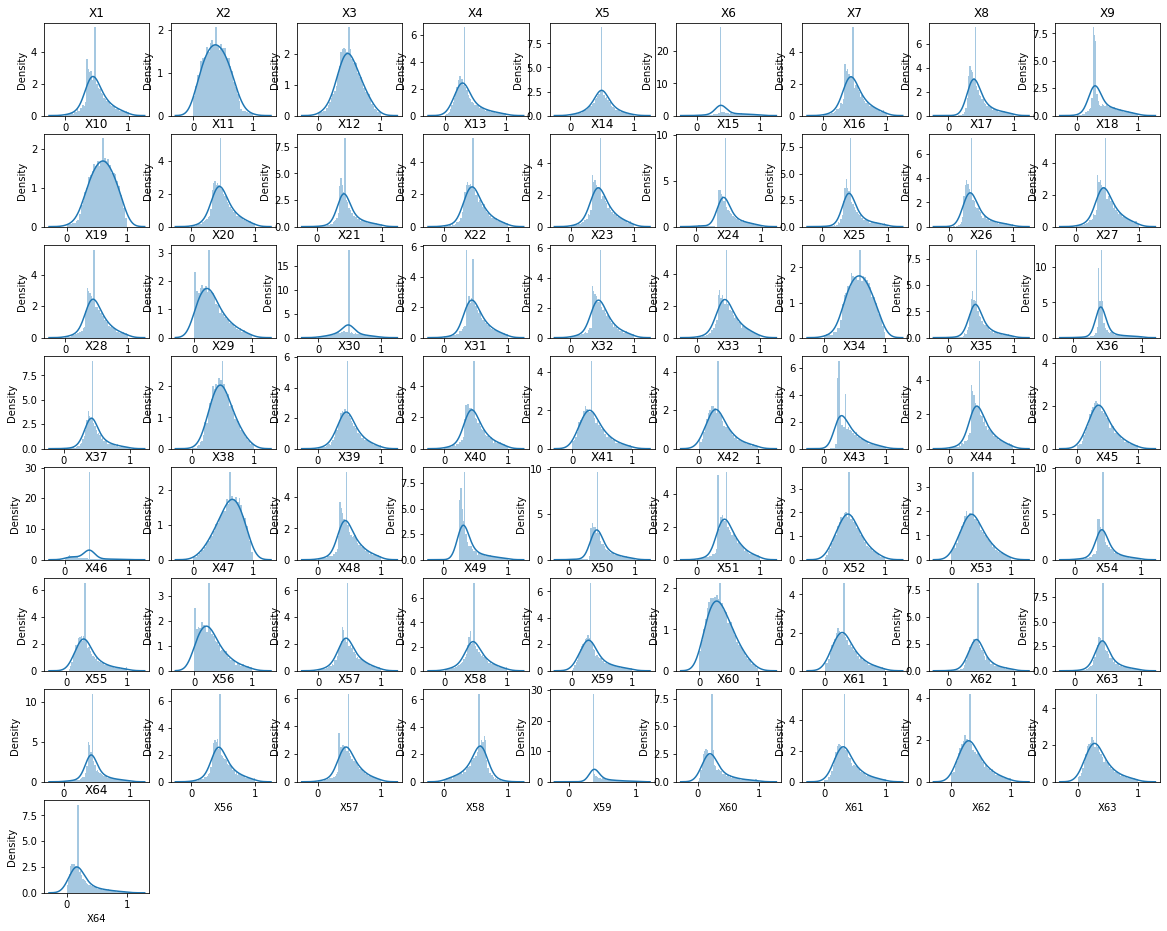

In [62]:
# Exploring continuous data

import matplotlib.pyplot as plt
plt.figure(figsize=(20,16))
for index, col in enumerate(cont_features, start=1):
    plt.subplot(8,9,index)
    plt.title(col)
    sb.distplot(resc_df[col], kde_kws={'bw':0.5}) # bw is bandwith

In [63]:
#following the rule that if the mean and the 50th percentile are identical and if the mean is identical
#with the middle point of the minimum value and the maximum value,
#a few of the features do not have normal distribution, then the data will be normalized

# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions
 
array = resc_df.values
# separate array into input and output components
X = array[:,0:64]
#Y = array[:,]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.158 0.069 0.147 0.102 0.138 0.085 0.164 0.109 0.069 0.137 0.159 0.14
  0.153 0.164 0.09  0.141 0.105 0.164 0.17  0.078 0.146 0.152 0.165 0.171
  0.147 0.137 0.097 0.163 0.108 0.09  0.162 0.095 0.062 0.061 0.15  0.086
  0.087 0.121 0.157 0.15  0.089 0.158 0.114 0.117 0.134 0.114 0.078 0.157
  0.165 0.126 0.084 0.095 0.151 0.146 0.096 0.134 0.151 0.091 0.084 0.047
  0.06  0.093 0.064 0.083]
 [0.158 0.089 0.157 0.095 0.123 0.083 0.163 0.096 0.1   0.132 0.159 0.124
  0.146 0.163 0.093 0.121 0.082 0.163 0.168 0.155 0.2   0.16  0.164 0.105
  0.127 0.117 0.091 0.096 0.078 0.119 0.16  0.121 0.047 0.101 0.144 0.082
  0.085 0.117 0.15  0.066 0.092 0.165 0.194 0.18  0.104 0.085 0.154 0.172
  0.18  0.117 0.108 0.121 0.099 0.097 0.104 0.131 0.152 0.078 0.082 0.023
  0.037 0.119 0.048 0.044]
 [0.164 0.116 0.115 0.072 0.106 0.078 0.17  0.073 0.073 0.092 0.167 0.127
  0.179 0.17  0.091 0.107 0.059 0.17  0.207 0.121 0.188 0.168 0.2   0.099
  0.104 0.104 0.086 0.121 0.115 0.141 0.198 0.165 0.031 0.0

In [64]:
newNorm_df = pd.DataFrame(normalizedX, columns =['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49',
       'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59',
       'X60', 'X61', 'X62', 'X63', 'X64'])

newNorm_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
0,0.158172,0.068694,0.147160,0.102468,0.137894,0.084994,0.163677,0.108605,0.068589,0.136655,...,0.096424,0.134119,0.150528,0.091427,0.084163,0.047125,0.059850,0.093294,0.063977,0.082516
1,0.158145,0.088507,0.156554,0.095213,0.122988,0.083139,0.163080,0.095576,0.100122,0.132416,...,0.104060,0.130879,0.151539,0.077568,0.081932,0.022723,0.037301,0.118519,0.048185,0.043824
2,0.163899,0.116101,0.115389,0.071727,0.105713,0.078337,0.170228,0.073269,0.072659,0.092249,...,0.134063,0.176886,0.098170,0.034245,0.078697,0.025758,0.042425,0.139678,0.036301,0.053324
3,0.117750,0.059804,0.169594,0.134131,0.162828,0.153733,0.116120,0.135509,0.068438,0.160331,...,0.103657,0.108758,0.109088,0.133661,0.090044,0.027537,0.045271,0.104875,0.065770,0.066278
4,0.159291,0.115739,0.123891,0.073395,0.115146,0.164223,0.147593,0.089471,0.072585,0.120059,...,0.119845,0.146365,0.174425,0.088821,0.114479,0.037358,0.052427,0.149710,0.043345,0.091488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.113628,0.116429,0.076877,0.041315,0.139362,0.124961,0.110810,0.131503,0.082696,0.174512,...,0.078036,0.109555,0.111013,0.196359,0.191440,0.068768,0.104878,0.047881,0.229452,0.077605
7023,0.098997,0.147713,0.106221,0.065024,0.120620,0.111630,0.097662,0.116908,0.083297,0.146178,...,0.082820,0.097333,0.092772,0.217985,0.119407,0.082997,0.116882,0.148516,0.078597,0.027300
7024,0.101514,0.117181,0.198860,0.120755,0.157401,0.112601,0.102271,0.125292,0.078191,0.173515,...,0.168487,0.101697,0.098664,0.188638,0.107854,0.075490,0.091148,0.074148,0.133467,0.057689
7025,0.082050,0.212638,0.080293,0.039855,0.043044,0.117729,0.086051,0.098473,0.035151,0.100240,...,0.094448,0.142697,0.029667,0.200332,0.118270,0.307941,0.050703,0.101689,0.027973,0.007848


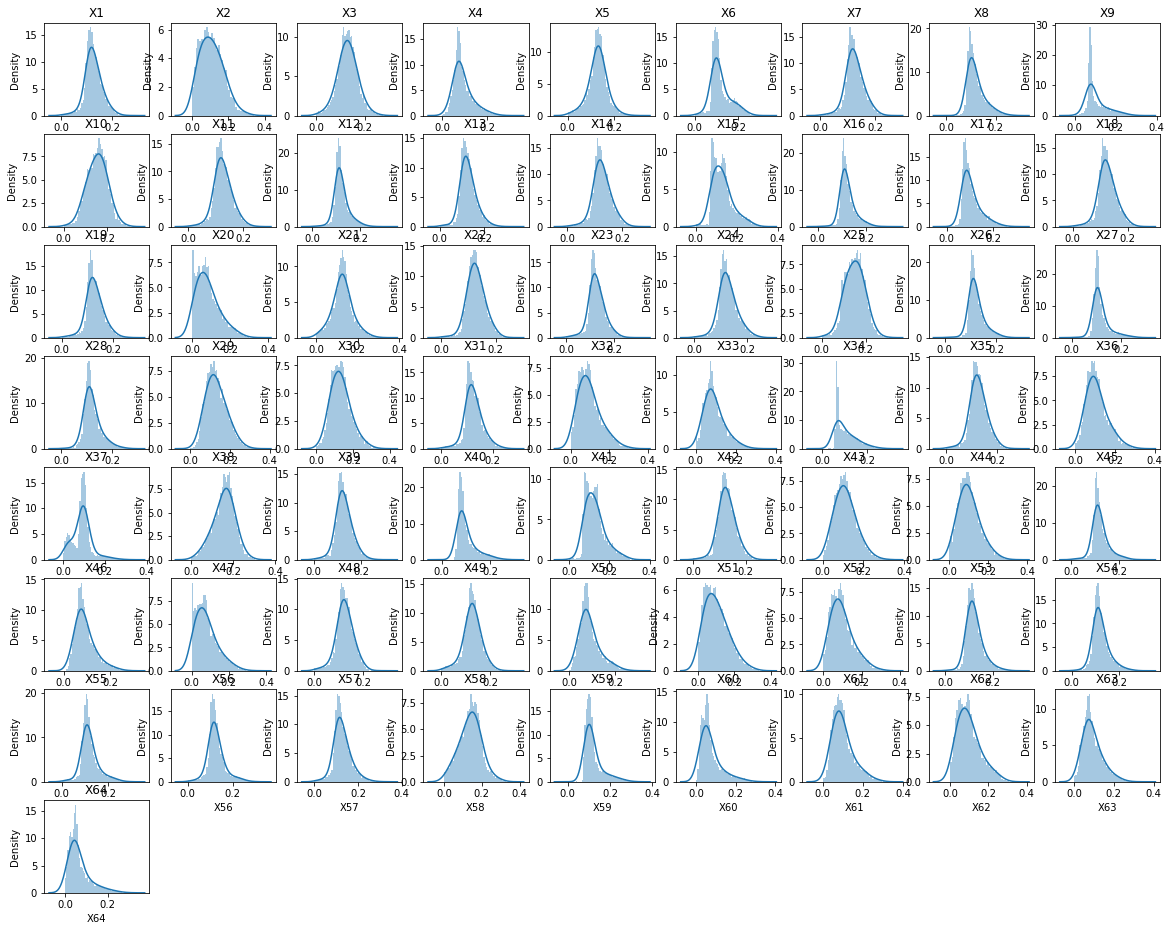

In [65]:
# Exploring continuous data

import matplotlib.pyplot as plt
plt.figure(figsize=(20,16))
for index, col in enumerate(cont_features, start=1):
    plt.subplot(8,9,index)
    plt.title(col)
    sb.distplot(newNorm_df[col], kde_kws={'bw':0.5}) # bw is bandwith

In [66]:
newNorm_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
count,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,...,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000
mean,0.126105,0.107129,0.129505,0.091452,0.129293,0.117613,0.126291,0.119038,0.103604,0.152894,...,0.120525,0.126090,0.128153,0.138951,0.119983,0.073021,0.100516,0.097813,0.092282,0.065687
std,0.032332,0.062161,0.039967,0.041912,0.038408,0.043176,0.031657,0.034110,0.049346,0.045571,...,0.037224,0.037062,0.038158,0.056167,0.042174,0.051365,0.051544,0.058826,0.047968,0.049834
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.107047,0.057719,0.105462,0.065003,0.110394,0.089958,0.107285,0.095119,0.072705,0.121328,...,0.099579,0.105866,0.104731,0.101895,0.093251,0.038471,0.063952,0.052557,0.059333,0.032739
50%,0.122616,0.101362,0.129524,0.080271,0.130922,0.105324,0.122996,0.109263,0.081979,0.154872,...,0.112754,0.119609,0.121841,0.142340,0.106964,0.058655,0.090549,0.088884,0.082156,0.051655
75%,0.144211,0.149813,0.154280,0.109721,0.150563,0.135123,0.144735,0.133654,0.123536,0.184538,...,0.133169,0.139690,0.147349,0.175658,0.128417,0.089210,0.124436,0.130421,0.118015,0.081597
max,0.279486,0.342697,0.275595,0.299812,0.297616,0.310206,0.253977,0.282591,0.320441,0.303047,...,0.303733,0.315619,0.323485,0.337035,0.326571,0.328742,0.321648,0.324512,0.336936,0.299711


In [67]:
newNorm_df['Y']=dfMed['Y']

newNorm_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.158172,0.068694,0.147160,0.102468,0.137894,0.084994,0.163677,0.108605,0.068589,0.136655,...,0.134119,0.150528,0.091427,0.084163,0.047125,0.059850,0.093294,0.063977,0.082516,0
1,0.158145,0.088507,0.156554,0.095213,0.122988,0.083139,0.163080,0.095576,0.100122,0.132416,...,0.130879,0.151539,0.077568,0.081932,0.022723,0.037301,0.118519,0.048185,0.043824,0
2,0.163899,0.116101,0.115389,0.071727,0.105713,0.078337,0.170228,0.073269,0.072659,0.092249,...,0.176886,0.098170,0.034245,0.078697,0.025758,0.042425,0.139678,0.036301,0.053324,0
3,0.117750,0.059804,0.169594,0.134131,0.162828,0.153733,0.116120,0.135509,0.068438,0.160331,...,0.108758,0.109088,0.133661,0.090044,0.027537,0.045271,0.104875,0.065770,0.066278,0
4,0.159291,0.115739,0.123891,0.073395,0.115146,0.164223,0.147593,0.089471,0.072585,0.120059,...,0.146365,0.174425,0.088821,0.114479,0.037358,0.052427,0.149710,0.043345,0.091488,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.113628,0.116429,0.076877,0.041315,0.139362,0.124961,0.110810,0.131503,0.082696,0.174512,...,0.109555,0.111013,0.196359,0.191440,0.068768,0.104878,0.047881,0.229452,0.077605,1
7023,0.098997,0.147713,0.106221,0.065024,0.120620,0.111630,0.097662,0.116908,0.083297,0.146178,...,0.097333,0.092772,0.217985,0.119407,0.082997,0.116882,0.148516,0.078597,0.027300,1
7024,0.101514,0.117181,0.198860,0.120755,0.157401,0.112601,0.102271,0.125292,0.078191,0.173515,...,0.101697,0.098664,0.188638,0.107854,0.075490,0.091148,0.074148,0.133467,0.057689,1
7025,0.082050,0.212638,0.080293,0.039855,0.043044,0.117729,0.086051,0.098473,0.035151,0.100240,...,0.142697,0.029667,0.200332,0.118270,0.307941,0.050703,0.101689,0.027973,0.007848,1


In [ ]:
#Feature Selection

In [68]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = newNorm_df.values
X = array[:, 0:64]
Y = array[:, 64]
#feature extraction
model = LogisticRegression()# Algorithm

rfe = RFE(model)
fit = rfe.fit(X, Y)
print("Num Features: {}".format(fit.n_features_))
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

Num Features: 32
Selected Features: [ True  True False  True False  True  True  True False False False  True
  True  True False  True False  True False False False False False  True
 False  True  True False False False False  True  True False  True False
  True False False False  True  True  True False  True  True False  True
  True  True  True False False  True  True False False  True False  True
  True False False False]
Feature Ranking: [ 1  1 19  1 24  1  1  1 18  5 32  1  1  1 15  1  4  1 11 16 31 33  3  1
 23  1  1 17 29 25  7  1  1 30  1  6  1 20 26 10  1  1  1 28  1  1 14  1
  1  1  1 22 21  1  1  8  9  1  2  1  1 13 27 12]
